# Amazon Reviews Sentiment Analysis

### importing required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
import nltk

### loading the dataset to local folder from kaggle and unzipping

In [5]:
!kaggle datasets download -d snap/amazon-fine-food-reviews


  0%|          | 0.00/242M [00:00<?, ?B/s]
  0%|          | 1.00M/242M [00:00<00:46, 5.44MB/s]
  2%|2         | 5.00M/242M [00:00<00:12, 19.7MB/s]
  5%|4         | 11.0M/242M [00:00<00:06, 35.3MB/s]
  7%|7         | 17.0M/242M [00:00<00:05, 43.9MB/s]
 10%|9         | 24.0M/242M [00:00<00:04, 51.7MB/s]
 13%|#2        | 31.0M/242M [00:00<00:03, 56.7MB/s]
 15%|#5        | 37.0M/242M [00:00<00:05, 42.9MB/s]
 19%|#8        | 45.0M/242M [00:01<00:04, 49.6MB/s]
 21%|##1       | 51.0M/242M [00:01<00:03, 50.1MB/s]
 24%|##3       | 58.0M/242M [00:01<00:03, 55.6MB/s]
 26%|##6       | 64.0M/242M [00:01<00:03, 57.3MB/s]
 29%|##9       | 71.0M/242M [00:01<00:03, 59.4MB/s]
 32%|###1      | 77.0M/242M [00:01<00:02, 60.1MB/s]
 35%|###4      | 84.0M/242M [00:01<00:02, 61.5MB/s]
 38%|###7      | 91.0M/242M [00:01<00:02, 64.0MB/s]
 40%|####      | 98.0M/242M [00:01<00:02, 65.7MB/s]
 43%|####3     | 105M/242M [00:02<00:02, 65.1MB/s] 
 46%|####6     | 112M/242M [00:02<00:02, 65.4MB/s]
 49%|####9     | 119M

In [6]:
import zipfile
zip_file_path='amazon-fine-food-reviews.zip'
extract_dir='dataset'
with zipfile.ZipFile(zip_file_path,'r') as zip_ref:
    zip_ref.extractall(extract_dir)

### loading data to DataFrames

In [4]:
full_df=pd.read_csv('./dataset/Reviews.csv')

In [5]:
full_df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
full_df.shape

(568454, 10)

Loading only part of the data

In [30]:
df=full_df[0:1000]

In [31]:
df.shape

(1000, 10)

### Exploratory Data Analysis

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      100000 non-null  int64 
 1   ProductId               100000 non-null  object
 2   UserId                  100000 non-null  object
 3   ProfileName             99994 non-null   object
 4   HelpfulnessNumerator    100000 non-null  int64 
 5   HelpfulnessDenominator  100000 non-null  int64 
 6   Score                   100000 non-null  int64 
 7   Time                    100000 non-null  int64 
 8   Summary                 99998 non-null   object
 9   Text                    100000 non-null  object
dtypes: int64(5), object(5)
memory usage: 7.6+ MB


In [32]:
df.dropna(subset=['Summary'],inplace=True)

C:\Users\jagad\AppData\Local\Temp\ipykernel_20068\1202807441.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(subset=['Summary'],inplace=True)


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [ ]:
df

Text(0.5, 1.0, 'count of reviews by stars')

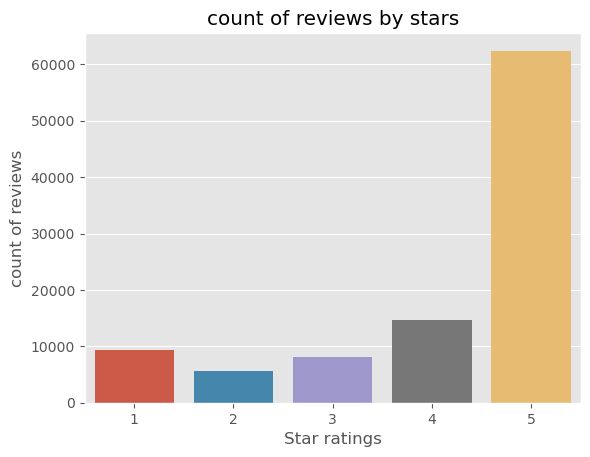

In [23]:
sns.countplot(x=df['Score'])
plt.xlabel('Star ratings')
plt.ylabel('count of reviews')
plt.title('count of reviews by stars')

### Baisc NLTK

In [34]:
example=df['Text'][100]
example

'The mouth says, "How do I love thee, let me count the ways..."<br />If you like apple products a must have item.  The only draw back, shipping cost.  These are very heavy.'

In [35]:
#nltk.download('punkt')
tok=nltk.word_tokenize(example)
tok[:10]

['The', 'mouth', 'says', ',', '``', 'How', 'do', 'I', 'love', 'thee']

In [36]:
#nltk.download('averaged_perceptron_tagger')
tag=nltk.pos_tag(tok)
tag[:10]

[('The', 'DT'),
 ('mouth', 'NN'),
 ('says', 'VBZ'),
 (',', ','),
 ('``', '``'),
 ('How', 'WRB'),
 ('do', 'VB'),
 ('I', 'PRP'),
 ('love', 'VB'),
 ('thee', 'NN')]

In [37]:
#nltk.download('maxent_ne_chunker')
#nltk.download('words')
chunked=nltk.chunk.ne_chunk(tag)
chunked.pprint()

(S
  The/DT
  mouth/NN
  says/VBZ
  ,/,
  ``/``
  How/WRB
  do/VB
  I/PRP
  love/VB
  thee/NN
  ,/,
  let/VB
  me/PRP
  count/VB
  the/DT
  ways/NNS
  .../:
  ''/''
  </VBZ
  br/NN
  //NNP
  >/NNP
  If/IN
  you/PRP
  like/VBP
  apple/NN
  products/NNS
  a/DT
  must/MD
  have/VB
  item/NN
  ./.
  The/DT
  only/JJ
  draw/NN
  back/RB
  ,/,
  shipping/VBG
  cost/NN
  ./.
  These/DT
  are/VBP
  very/RB
  heavy/JJ
  ./.)


### VADER

Valence Aware Dictionary and sEntiment Analysis Reasoner
- bag of words approach
- stop words are removed
- don't account for relation b/w words
- each word is scored and combined to a total score

In [38]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm import tqdm

#nltk.download('vader_lexicon')

sent_anal= SentimentIntensityAnalyzer()

In [39]:
sent_anal.polarity_scores('OMG i broke my leg')

{'neg': 0.483, 'neu': 0.517, 'pos': 0.0, 'compound': -0.4215}

In [40]:
sent_anal.polarity_scores('im going to india for my birthday')

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

##### running polarity scores for the entire dataset

In [41]:
out={}
for i, row in tqdm(df.iterrows(), total=len(df)):
    out[row['Id']] = sent_anal.polarity_scores(row['Text'])

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1138.22it/s]


In [15]:
out

{1: {'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441},
 2: {'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664},
 3: {'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265},
 4: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 5: {'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468},
 6: {'neg': 0.029, 'neu': 0.809, 'pos': 0.163, 'compound': 0.883},
 7: {'neg': 0.034, 'neu': 0.693, 'pos': 0.273, 'compound': 0.9346},
 8: {'neg': 0.0, 'neu': 0.52, 'pos': 0.48, 'compound': 0.9487},
 9: {'neg': 0.0, 'neu': 0.851, 'pos': 0.149, 'compound': 0.6369},
 10: {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8313},
 11: {'neg': 0.017, 'neu': 0.846, 'pos': 0.137, 'compound': 0.9746},
 12: {'neg': 0.113, 'neu': 0.887, 'pos': 0.0, 'compound': -0.7579},
 13: {'neg': 0.031, 'neu': 0.923, 'pos': 0.046, 'compound': 0.296},
 14: {'neg': 0.0, 'neu': 0.355, 'pos': 0.645, 'compound': 0.9466},
 15: {'neg': 0.104, 'neu': 0.632, 'pos': 0.264, 'compound': 0.6486},
 

In [42]:
vader=pd.DataFrame(out).T
vader=vader.reset_index().rename(columns={'index':'Id'})
vader=vader.merge(df,how='left')

In [43]:
vader.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### VADER Results
##### to check if the compound values are similar to the stars(scores)

Text(0.5, 1.0, 'compound score vs stars')

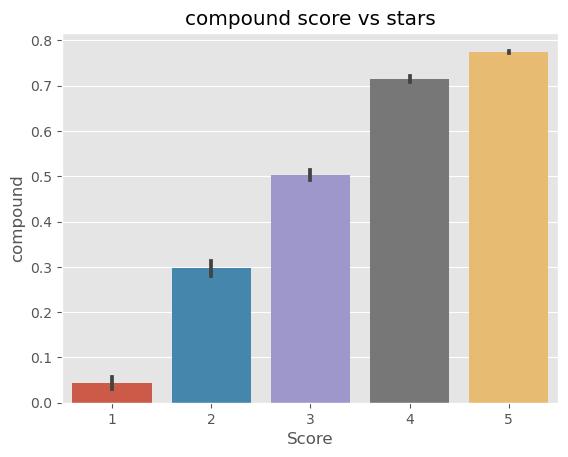

In [82]:
sns.barplot(data=vader, x='Score',y='compound')
plt.title('compound score vs stars')

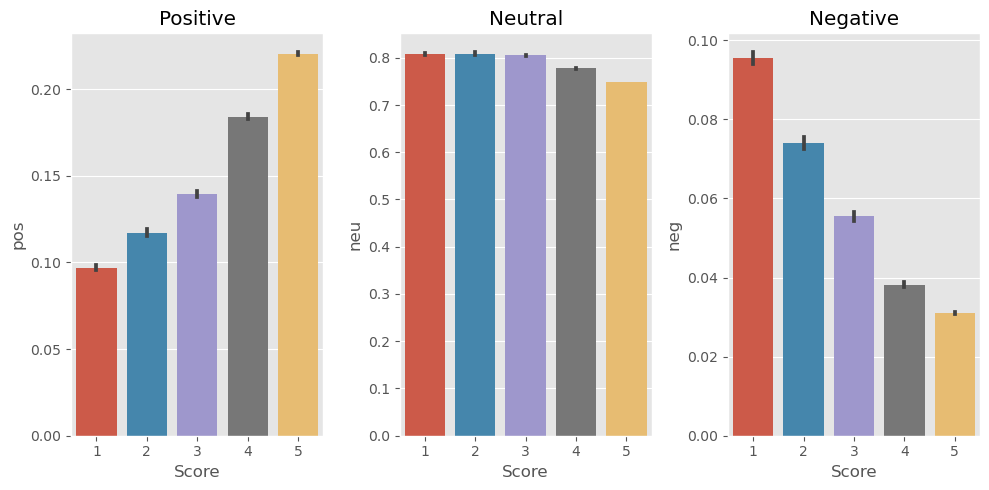

In [85]:
fig,axs=plt.subplots(1,3,figsize=(10,5))
sns.barplot(data=vader,x='Score',y='pos',ax=axs[0])
sns.barplot(data=vader,x='Score',y='neu',ax=axs[1])
sns.barplot(data=vader,x='Score',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.tight_layout()

### Roberta Pretrained Model
- transformer model accounts for the words and the cotext related to other words

In [1]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax
import torch

In [44]:
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

In [45]:
encoded_text=tokenizer(example,return_tensors='pt')
output=model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' :scores[2]
}
scores_dict

{'roberta_neg': 0.30692145, 'roberta_neu': 0.456569, 'roberta_pos': 0.23650958}

In [46]:
def roberta_polarity_scores(example):
    encoded_text=tokenizer(example,return_tensors='pt')
    output=model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' :scores[2]
    }
    return scores_dict

In [47]:
out={}
for i,row in tqdm(df.iterrows(),total=len(df)):
    try:
        vader_result=sent_anal.polarity_scores(row["Text"])
        roberta_result=roberta_polarity_scores(row['Text'])
        vader_result_rename={}
        for key,value in vader_result.items():
            vader_result_rename[f"vader_{key}"]=value
        both={**vader_result_rename,** roberta_result}
        out[row['Id']]=both
    except RuntimeError:
        print('broke')

  8%|██████▋                                                                         | 84/1000 [00:14<01:52,  8.17it/s]

broke


 19%|██████████████▋                                                                | 186/1000 [00:29<01:51,  7.32it/s]

broke


 53%|█████████████████████████████████████████▋                                     | 528/1000 [01:27<01:50,  4.28it/s]

broke


 54%|██████████████████████████████████████████▋                                    | 540/1000 [01:28<00:50,  9.06it/s]

broke


 74%|██████████████████████████████████████████████████████████▊                    | 745/1000 [02:05<01:11,  3.58it/s]

broke


 86%|████████████████████████████████████████████████████████████████████▎          | 865/1000 [02:25<00:18,  7.42it/s]

broke


100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [02:50<00:00,  5.86it/s]


In [48]:
results_df=pd.DataFrame(out).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df=results_df.merge(df,how='left')

### score comparission

In [49]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

C:\Users\jagad\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


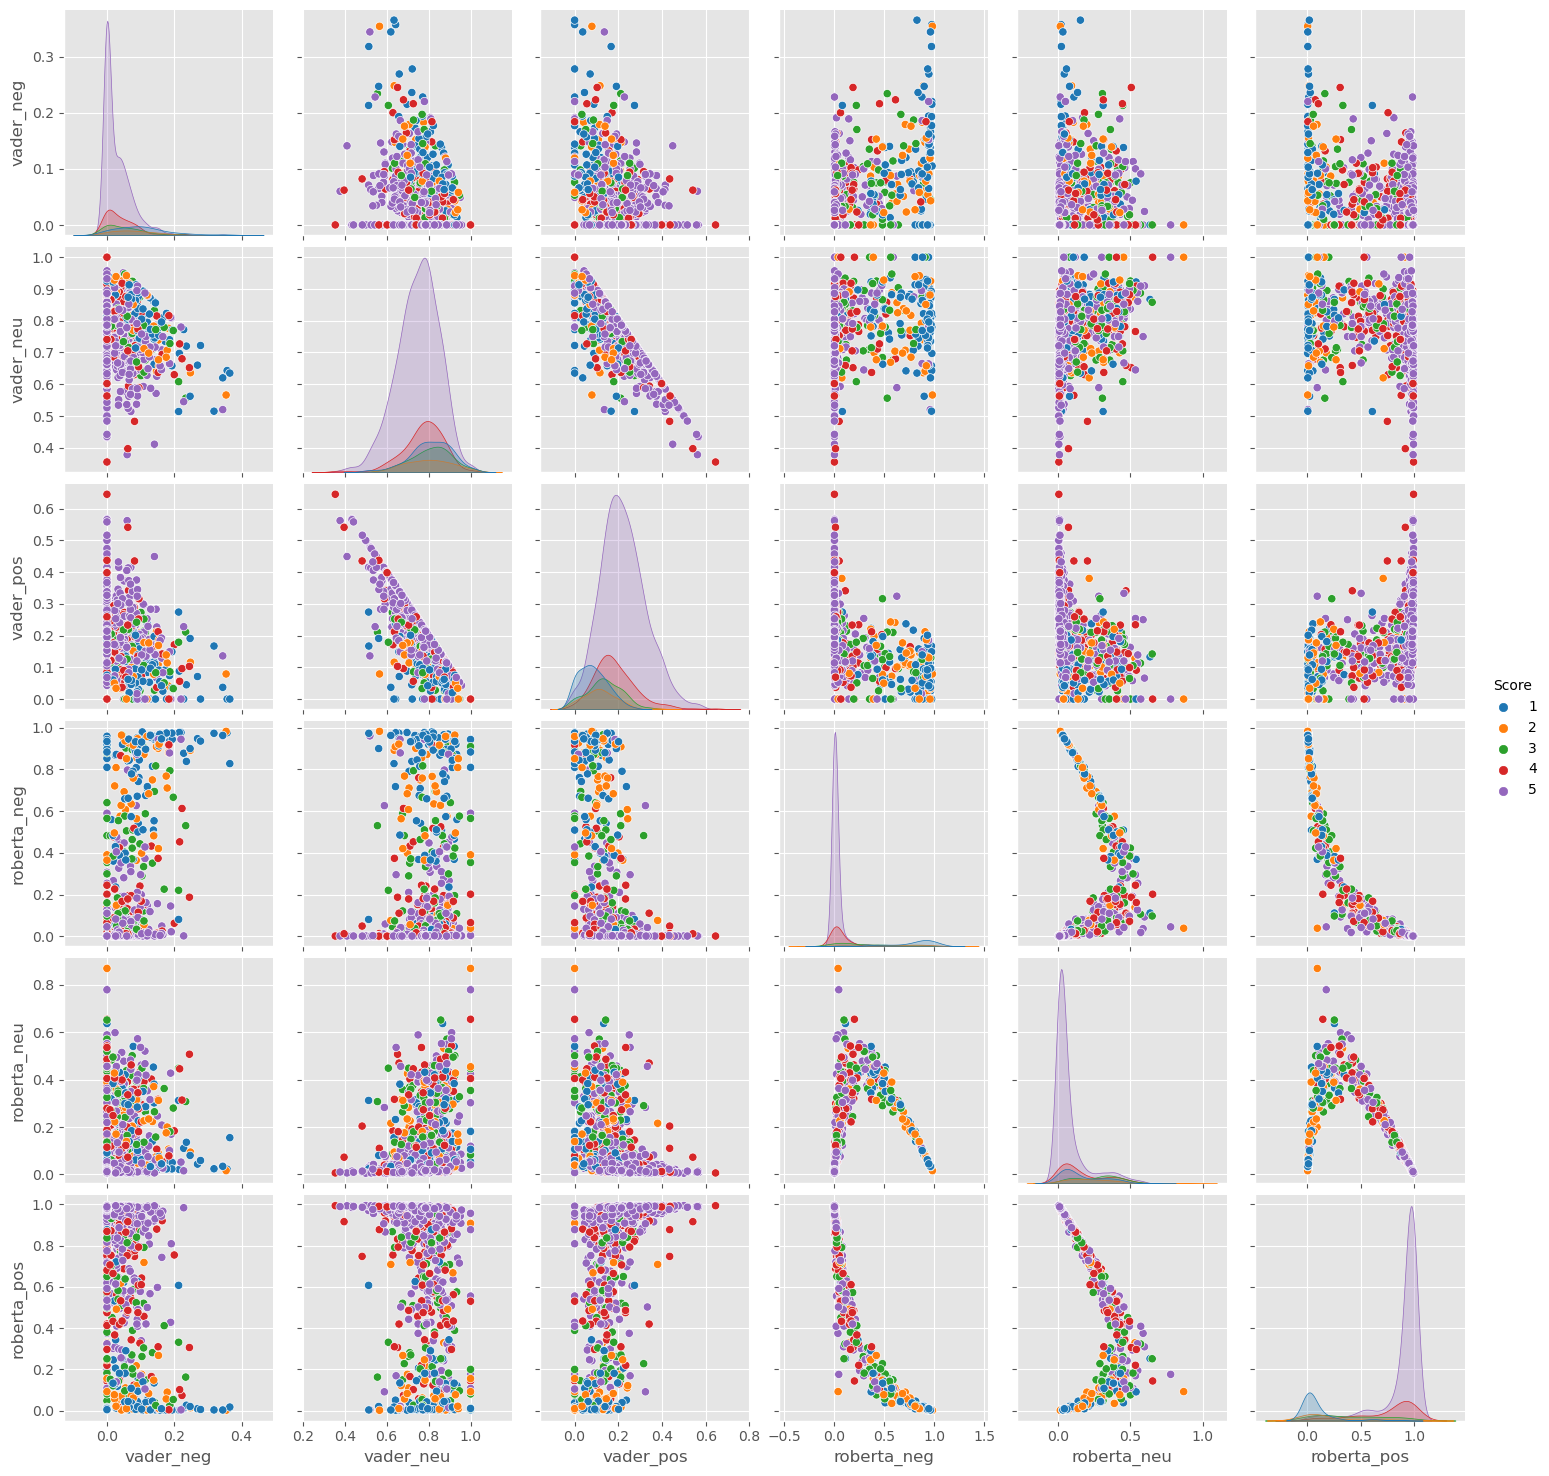

In [51]:

sns.pairplot(data=results_df,vars=['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score',
            palette='tab10')

In [53]:
results_df.query('Score==1').sort_values('roberta_pos',ascending=False)['Text'].values[0]

"I just wanted to post here that I found small bits of plastic in this food as I was feeding my 9 month old.  Plastic!!! in food!!!! baby food!!!  So please be careful if you buy this or are considering it.<br /><br />My daughter LOVES this food-- it's actually her favorite.  This is the first time we have noticed plastic in it in over 2 months."

In [54]:
results_df.query('Score==1').sort_values('vader_pos',ascending=False)['Text'].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [56]:
results_df.query('Score==5').sort_values('vader_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [57]:
results_df.query('Score==5').sort_values('roberta_neg',ascending=False)['Text'].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [58]:
from transformers import pipeline
sent_pipeline=pipeline("sentiment-analysis")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [60]:
sent_pipeline("this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault")

[{'label': 'NEGATIVE', 'score': 0.9980344176292419}]